# This is just a notebook to visualise 1kHz filtered raw data

## Setup everything

### Import packages

In [11]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

from ephyviewer import mkQApp, MainViewer, TraceViewer, TimeFreqViewer, InMemoryAnalogSignalSource, EventList
from ephyviewer import AnalogSignalSourceWithScatter, SpikeInterfaceRecordingSource, InMemoryEventSource

# add the Contrib dir that contains all tools developped by MB : mbTools.py
#sys.path.append(os.path.join(os.path.dirname(sys.path[0]),'python'))
#print(os.path.join(os.path.dirname(sys.path[0]),'python'))
import mbTools


## Choose experiment
Select the folder of the experiment to display. If the experiment was already analyzed, you can select the iterimAnalysis folder. Otherwise select the raw data recording folder.

In [12]:
theExpe = mbTools.experiment()

Local config file loaded from localConfig.ini
reseting vars
current folder \\10.69.168.1\crnldata\waking\audrey_hay\NPX\interimAnalysis\NPX5\PO\Expe_2024-07-30_11-20-27 contains a config file
\\10.69.168.1\crnldata\waking\audrey_hay\NPX\interimAnalysis\NPX5\PO\Expe_2024-07-30_11-20-27\expeConfig1.ini saved


FileChooser(path='\\10.69.168.1\crnldata\waking\audrey_hay\NPX\interimAnalysis\NPX5\PO\Expe_2024-07-30_11-20-2…

reseting vars
current folder \\10.69.168.1\crnldata\waking\audrey_hay\NPX\NPX5\Reuniens\Expe_2024-07-25_18-51-19 does not contain a config file, it must be the raw data folder
a location for interim analysis was provided so using it
\\10.69.168.1\crnldata\forgetting\Aurelie\Annie\RealignementMB\interimAnalysis\NPX5\Reuniens\Expe_2024-07-25_18-51-19
forgetting\Aurelie\Annie\RealignementMB\interimAnalysis\NPX5\Reuniens\Expe_2024-07-25_18-51-19
\\10.69.168.1\crnldata\forgetting\Aurelie\Annie\RealignementMB\interimAnalysis\NPX5\Reuniens\Expe_2024-07-25_18-51-19\expeConfig1.ini saved


## Load Data

### Map the whole data into memory

In [13]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
theExpe.analyseExpe_findData(fullSampling=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
could not load channel map. Please make sure the animalID NPX5 is mapped in the file \\10.69.168.1\crnldata\waking\audrey_hay\NPX\interimAnalysis\NPX5\channelMaps.ini
********found some .bin files********
[WindowsPath('//10.69.168.1/crnldata/waking/audrey_hay/NPX/NPX5/Reuniens/Expe_2024-07-25_18-51-19/OE_32ch_data_2024-07-25T18_51_19.bin')]
data recorded with Bonsai
importing \\10.69.168.1\crnldata\waking\audrey_hay\NPX\NPX5\Reuniens\Expe_2024-07-25_18-51-19\OE_32ch_data_2024-07-25T18_51_19.bin
applying offset
converting to int16
IntanLFP file loaded, with 32 channels and 34760704 datapoint
No section: 'OE_LFP'
the mapping: None
the offset:  0.0
the sampling rate:  1000
timestamps basename in file name is timestamps
no ref time found for the expe so trying to get it from title
the calculated launch start is 2024-07-25 18:51:19+02:00
the calculated sampling rate is 4998.816676931049 Hz
the recording 

c:\Users\Manip7\Documents\GitRepo\HayLabAnalysis\.venv\Lib\site-packages\spikeinterface\core\baserecording.py:492: UserWarning: Setting times with Recording.set_times() is not recommended because times are not always propagated across preprocessingUse this carefully!
  warnings.warn(


### Extract submatrix of interest

In [14]:
#initiate combined and channelLabels
combined =  {}
channelLabels = {}
sample_rates = {}
t_start = {}
#t_end = 300 #seconds

### Extract submatrix of interest

In [15]:
#LFP
if 'OE_LFP' in theExpe.data:
    sample_rates['LFP'] = theExpe.data['OE_LFP'].sampling_rate #20000
    t_start['LFP'] = theExpe.data['OE_LFP'].start
    combined['LFP'] = theExpe.data['OE_LFP'].combineStructures(None)#['M1'])
    channelLabels['LFP'] = theExpe.data['OE_LFP'].channelLabels[:]
    print("LFP data combined")
else:
    print("no LFP data to combine")
print()

LFP data combined



In [16]:
#NPX
if 'NPX' in theExpe.data:
    sample_rates['NPX'] = theExpe.data['NPX'].sampling_rate #30000
    t_start['NPX'] = theExpe.data['NPX'].start
    combined['NPX'] = theExpe.data['NPX'].signal['spike'].select_channels([0,1])
    channelLabels['NPX'] = theExpe.data['NPX'].channelLabels
    print("NPX data combined")
else:
    print("no NPX data to combine")

NPX data combined


## Look for artefacts
here you should start aphyviewer and scroll for artefacts. Try to get ate least 3 distributed along recording and write their rough time in the cell above ephyviewer's cell

In [10]:
try:
    print(f"artifact are around: {artefacts} s")
except Exception:
    print('make sure you have manually defined artifacts times at the end of notebook')

artifact are around: [3374, 4894] s


In [ ]:
#6174
theExpe.data['OE_LFP'].resetAlign()
start=42#-100
#thedata.data['OE_LFP'].start=52
#thedata.data['OE_LFP'].sampling_rate=20046
theExpe.data['OE_LFP'].reAlignTimes()
start=0
print(theExpe.data['NPX'])
%matplotlib widget
mbTools.tools.superCleanPlot(theExpe.data['OE_LFP'], theExpe.data['NPX'], canauxLFP=np.arange(5,6), canauxNPX=[0], scaleNPX=10, time=3374-start) #structureLFP=['M1'], 

In [ ]:

NPX=[3374.402017885, 4894.289311424] #
timesreset=[3329.5068804, 4852.947944337] #
thedata.data['OE_LFP'].resetAlign()
LFPpoint=[]
for t in timesreset:
    if t is not np.nan:
        p=mbTools.find_nearest(thedata.data['OE_LFP'].times,t)
    else:
        p=np.nan
    print(p)
    LFPpoint.append(p)
print(LFPpoint)
LFPpoint=np.array(LFPpoint).reshape(-1, 1)
NPX2=np.array(NPX).reshape(-1, 1)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,root_mean_squared_error 

reg = LinearRegression()
reg.fit(LFPpoint,NPX2)
freq = 1/reg.coef_[0][0]
start = reg.intercept_[0]#+thedata.data['NPX'].times[0]
print(freq, start)
thedata.data['OE_LFP'].sampling_rate=freq
thedata.data['OE_LFP'].start=start

print(reg.score(LFPpoint, NPX2)) 

y_pred = reg.predict(LFPpoint) 
mae = mean_absolute_error(y_true=NPX2,y_pred=y_pred) 
#squared True returns MSE value, False returns RMSE value. 
mse = root_mean_squared_error(y_true=NPX2,y_pred=y_pred) #default=True 

print("MAE:",mae) 
print("MSE:",mse) 

thedata.data['OE_LFP'].updateParser('start',start)
thedata.data['OE_LFP'].updateParser('freq',freq)
thedata.data['OE_LFP'].updateParser('NPX',NPX)
thedata.data['OE_LFP'].updateParser('timesreset',timesreset)

plt.close()
plt.plot(LFPpoint,y_pred,color='r')
plt.scatter(LFPpoint,NPX)
plt.show()

ok, fitting is good with plenty of artefacts to realign, now let's try to find a function that depends on timestamps, number of points theoric frequencies...
first; let's try to see how many samples are recorded by npx at the end of recording compared to LFP

In [ ]:
sizeLFP=thedata.data['OE_LFP'].signal.shape[0]
print(sizeLFP)

sizeNPX=thedata.data['NPX'].signal['spike'].get_num_frames()
print(sizeNPX)
print(thedata.data['NPX'].times.shape)

print(thedata.data['NPX'].times)
print(thedata.data['OE_LFP'].times)

thedata.data['OE_LFP'].reAlignTimes()

lastT=thedata.data['NPX'].times[-1]
idx=mbTools.find_nearest(thedata.data['OE_LFP'].times,lastT)
print(idx)
print(thedata.data['OE_LFP'].times[idx])
print(sizeLFP-idx)
print(idx%1024)


lastT=thedata.data['OE_LFP'].times[-1]
idx=mbTools.find_nearest(thedata.data['NPX'].times,lastT)
print(idx)
print(thedata.data['NPX'].times[idx])
print(sizeNPX-idx)
#there are 693 npx samples recorded after stop


the recordings seem to end together, it might be a coincidence that recording stops so near a multiple of 1024 => should make sure on another experiment.
Now, let's see if we can use the end of recordin and a single artefact to realign everything

In [ ]:
thedata.data['OE_LFP'].resetAlign() #so that lfpT is correct

#let's try with first artefact as pt 1
npxT1= NPX[0] #57.079179468   #213.831317136 #214.083826084  #459096    
lfpT1= timesreset[0] #5.64385005  #162.7626014 #163.0008 #6385152
idx1=mbTools.find_nearest(thedata.data['OE_LFP'].times,lfpT1)
print(idx1)
print(thedata.data['OE_LFP'].times[idx1])

if False:
    #let's try with last artefact as pt 2
    npxT2= NPX[-1] #57.079179468   #213.831317136 #214.083826084  #459096    
    lfpT2= timesreset[-1] #5.64385005  #162.7626014 #163.0008 #6385152
    idx2=mbTools.find_nearest(thedata.data['OE_LFP'].times,lfpT2)
    print(idx2)
    print(thedata.data['OE_LFP'].times[idx2])
else:
    #let's try with end of file
    endoffset=-243
    print(thedata.data['OE_LFP'].signal.shape[0])
    npxT2=thedata.data['NPX'].times[thedata.data['NPX'].signal['spike'].get_num_frames()-endoffset]
    print(npxT2)
    #lfpT2= thedata.data['NPX'].times[-endoffset]
    idx2=thedata.data['OE_LFP'].signal.shape[0]
    print(idx2)
    print(thedata.data['OE_LFP'].signal.shape[0]-endoffset)
    


dn=idx2-idx1
print(f"dn measured with lfp : {dn}")



#iNPX=mbTools.find_nearest(thedata.data['NPX'].times,npxT1)
#print(iNPX)

#print(f"dt measured with npx : {thedata.data['NPX'].times[-1]-npxT}")
#npxdt=thedata.data['NPX'].times[-1]-npxT


#print(npxT-lfpT)



#print(thedata.data['NPX'].times)
#print(thedata.data['OE_LFP'].times)
#thedata.data['OE_LFP'].times+=(thedata.data['NPX'].times[-1]-thedata.data['OE_LFP'].times[-1])
#print(thedata.data['OE_LFP'].times)

#dt=thedata.data['OE_LFP'].times[-1]-npxT1

dt=npxT2-npxT1
print(f"dt measured with lfp : {dt}")



freqC=dn/dt
print("the calculated freq is :", freqC)
print("while it previously was: ", thedata.data['OE_LFP'].sampling_rate)
print("diff is: ", thedata.data['OE_LFP'].sampling_rate-freqC)


#thedata.data['OE_LFP']
#realign(offset=0, freq=freqC)
#print("times npx", thedata.data['NPX'].times)
#print("times lfp", thedata.data['OE_LFP'].times)
#offsetC=-(thedata.data['OE_LFP'].times[-1]-thedata.data['NPX'].times[-1])
#print("calculated offset", offsetC)

#realign(offset=offsetC, freq=freqC)

#superCleanPlot(55)



### Load extra stuff

In [ ]:
from mbTools import mbTools
All_Spindle, M1 = thedata.data['OE_LFP'].loadSpindles(relativePath='../LFP', structure = "M1")
combined['LFP_DS']=M1[:,np.newaxis]
channelLabels['LFP_DS'] = ['M1_DS']
freqInitTheoric=20000
freqDS=1000
realignFactor=freqInitTheoric/sample_rates['LFP']
sample_rates['LFP_DS']=freqDS*realignFactor
t_start['LFP_DS']=t_start['LFP']
print(realignFactor)

In [ ]:

M1_i=thedata.data['OE_LFP'].combineStructures(['M1'])[:,0]
M1_1=thedata.data['OE_LFP'].signal[:,16]
M1_2=thedata.data['OE_LFP'].signal[:,17]
M1_iL=thedata.data['OE_LFP'].channelLabels[:]
print(M1_1.shape)
print(M1_2.shape)
print(M1_i.shape)
combined['LFP'] = np.stack([M1_i,M1_1, M1_2], axis = 1) #cortex, filt_cortex, proj_cortexC, proj_cortex
print(combined['LFP'].shape)
channelLabels['LFP'] = ['M1_iL','ch16','ch17']



## Display

3373.9999883140767
66582077
[4.27045600e-03 4.30370800e-03 4.33696400e-03 ... 5.51271731e+03
 5.51271735e+03 5.51271738e+03]
101456992
(150350, 1)


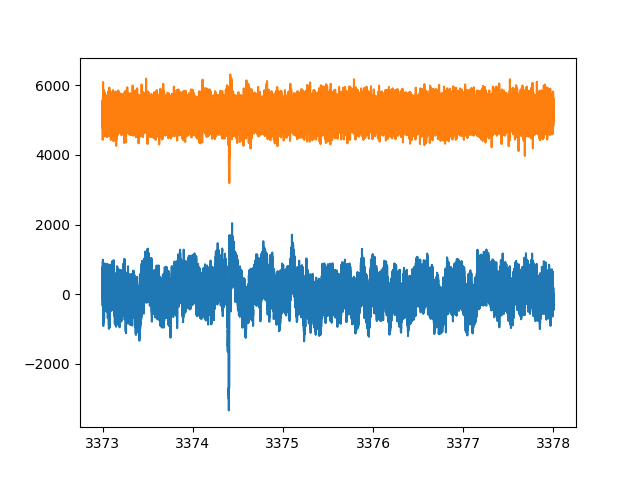

In [8]:
#this cell can be used to plot very precisely time of interest. Beware that it conflicts with ephyviewer however. It might be possible to have 2 notebooks open simultanéeously...
theExpe.data['OE_LFP'].reAlignTimes()
if True:
    %matplotlib widget
    #you can confiure a y-offset and some scaling, have a look at the help of superCleanPlot
    #artefacts=[55, 2649, 2709, 5362]
    mbTools.tools.superCleanPlot(theExpe.data['OE_LFP'], theExpe.data['NPX'], canauxLFP=np.arange(5,6), canauxNPX=[0], scaleNPX=10, time=3374) #structureLFP=['M1'], 
    #picFN = os.path.sep.join([theExpe.rawDataPath,'A1-8978.svg'])
    #plt.savefig(picFN, format="svg")

In [9]:
# write here the rough times of artifacts on NPX and run the cell so that the list is accessible above
artefacts=[3374, 4894]

In [7]:
%gui qt
app = mkQApp()

#Create the main window that can contain several viewers
win = MainViewer(debug=True)

if 'LFP' in combined:
    print(np.round(sample_rates['LFP']))
    source = InMemoryAnalogSignalSource(combined['LFP'], np.round(sample_rates['LFP']), t_start['LFP'], channel_names=channelLabels['LFP'])
    view1 = TraceViewer(source=source, name = 'LFP')

    #Parameters can be set in script
    view1.params['display_labels'] = True
    view1.params['scale_mode'] = 'same_for_all'
    view1.auto_scale()

    cmap = matplotlib.colormaps["hsv"]#Wistia"]
    nCh = len(view1.by_channel_params.children())
    for ch in range(nCh):
        #view1.by_channel_params[f'ch{ch}', 'gain'] = 0.00002
        #view1.by_channel_params[f'ch{ch}', 'offset'] = 0.1
        view1.by_channel_params[f'ch{ch}', 'color'] = matplotlib.colors.to_hex(cmap(ch/nCh), keep_alpha=False)
        pass

    win.add_view(view1)


if 'NPX' in combined:
    sig_source = SpikeInterfaceRecordingSource(recording=combined['NPX'], high_precision=True)
    view3 = TraceViewer(source=sig_source, name='NPX')
    win.add_view(view3)

    #Parameters can be set in script
    view3.params['display_labels'] = True
    view3.params['scale_mode'] = 'same_for_all'
    view3.auto_scale()

    cmap = matplotlib.colormaps["hsv"]#Wistia"]
    nCh = len(view3.by_channel_params.children())
    for ch in range(nCh):
        #view3.by_channel_params[f'ch{ch}', 'gain'] = 0.00002
        #view3.by_channel_params[f'ch{ch}', 'offset'] = 0.1
        view3.by_channel_params[f'ch{ch}', 'color'] = matplotlib.colors.to_hex(cmap(ch/nCh), keep_alpha=False)
        pass

#Run
win.show()

debug True
QT_MODE PySide6
20047.0
auto_scale same_for_all
compute_auto_clim
[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False]
refresh duration for LFP 0.0 s
refresh duration for LFP 0.0009996891021728516 s
refresh duration for LFP 0.0 s
viewer has moved already 0 52.66196429640968 0.0
refresh duration for tfr 0.002445220947265625 s
refresh duration for LFP 0.0010006427764892578 s
refresh duration for tfr 0.0019991397857666016 s
refresh duration for NPX 0.0010027885437011719 s


refresh duration for LFP 0.0009951591491699219 s
refresh duration for tfr 0.006995439529418945 s
refresh duration for NPX 0.0 s
auto_scale same_for_all
compute_auto_clim
[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False]
refresh duration for LFP 0.0 s
refresh duration for tfr 0.006003618240356445 s
refresh duration for NPX 0.0 s
refresh duration for LFP 0.0 s
refresh duration for tfr 0.001999378204345703 s
refresh duration for NPX 0.0 s
refresh duration for LFP 0.0009996891021728516 s
refresh duration for tfr 0.0060024261474609375 s
refresh duration for NPX 0.0 s
refresh duration for LFP 0.0 s
refresh duration for tfr 0.0030112266540527344 s
refresh duration for NPX 0.0009887218475341797 s
refresh duration for LFP 0.0 s
refresh duration for tfr 0.0035028457641601562 s
refresh duration for NPX 0.0 s
refresh duration for LFP 0.001001358032226562